# Case Study: How can a wellness technology company play it smart? 

## Introduction
Bellabeat, a high-tech manufacturer of health-focused products for women, want to analyze smart device data to gain insight into how consumers are using their smart devices. The insights will then help guide marketing strategy for the company.

## Business task
Explore and analyze the trends in smart device usage, apply the insight to encourage and provide better customer's experience and help Bellabeat marketing strategy. 

## Data
- We will get smart device data from [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit), which generated by respondents to a distributed survey via Amazon Mechanical Turk between 04.12.2016-05.12.2016.  
- After explore the data, we found it mostly organized in long format and have no data about sex and age range, so we can not analyse the characteristic in each sex and age range.  
- The data is out-dated, the user's behavior may change from 2016.
- The data may be bias because it's collected from Fitbit users who respondents to the survey. These users may tend to be more active than common people.

## Prepare data
Import 4 data sets; **dailyActivity** and **sleepDay** which record activities (steps, calories, active time, sleep duration) in daily.

In [1]:
library("readr")
library("dplyr")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dailyData_raw <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailySleep_raw <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# View data and data type
head(dailyData_raw)
head(dailySleep_raw)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [4]:
# Check number of records
nrow(dailyData_raw)
nrow(dailySleep_raw)

# Check distinct Id
n_distinct(dailyData_raw$Id)
n_distinct(dailySleep_raw$Id)

[1] 940

[1] 413

[1] 33

[1] 24

`dailyData_raw` has total 940 records and 33 distinct users.  
`dailySLeep_raw` has total 413 records and 24 distinct users.

## Transform data
For Id column, change data type to `character`, so it will not be misinterpret when summarising.  
For ActivityDate, SleepDay, ActivityHour, change data type to `date-time`. 
Then joining them into daily data.

In [5]:
# Change data type
dailyData <- dailyData_raw %>%
  mutate(Id = as.character(Id)) %>%
  mutate(ActivityDate = strptime(ActivityDate, "%m/%d/%Y")) 

dailySleep <- dailySleep_raw %>%
  mutate(Id = as.character(Id)) %>%
  mutate(SleepDay = strptime(SleepDay, "%m/%d/%Y %I:%M:%S %p"))

In [6]:
# Join daily data and keep only necessary columns
dailyData <- full_join(dailyData, dailySleep, by = c("Id", "ActivityDate" = "SleepDay")) %>%
  select(-c(TrackerDistance, 
            LoggedActivitiesDistance, 
            VeryActiveDistance, 
            ModeratelyActiveDistance, 
            LightActiveDistance, 
            SedentaryActiveDistance))

head(dailyData)

Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,1,327,346
1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,2,384,407
1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,NA,NA,NA
1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,1,412,442
1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,2,340,367
1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,1,700,712


**Add new columns for dailyData**  
- TotalActiveMinutes: Total active time is sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes  
- wkDay: Describe weekday

In [7]:
# Add new column TotalActiveMinutes
dailyData <- dailyData %>% 
  mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

# Add new column wkDay
dailyData <- dailyData %>% 
  mutate(wkDay = format(as.POSIXct(ActivityDate), format = "%A")) 

dailyData$wkDay <- factor(dailyData$wkDay, 
                          levels = c("Monday", "Tuesday", "Wednesday", 
                                     "Thursday", "Friday", "Saturday", "Sunday"))

## Analyze data
Explore the record of `dailyData` which contains activities in daily.

From summary data, it have average walk at 7,652 steps/day and sleep duration 7.0 hours (419.5 minutes) but the data may be influenced by few users who record more data, later group the data into each user.

In [8]:
summary(dailyData)

      Id             ActivityDate                   TotalSteps   
 Length:943         Min.   :2016-04-12 00:00:00   Min.   :    0  
 Class :character   1st Qu.:2016-04-19 00:00:00   1st Qu.: 3795  
 Mode  :character   Median :2016-04-26 00:00:00   Median : 7439  
                    Mean   :2016-04-26 07:21:18   Mean   : 7652  
                    3rd Qu.:2016-05-04 00:00:00   3rd Qu.:10734  
                    Max.   :2016-05-12 00:00:00   Max.   :36019  
                                                                 
 TotalDistance    VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   : 0.000   Min.   :  0.00    Min.   :  0.00      Min.   :  0         
 1st Qu.: 2.620   1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127         
 Median : 5.260   Median :  4.00    Median :  7.00      Median :199         
 Mean   : 5.503   Mean   : 21.24    Mean   : 13.63      Mean   :193         
 3rd Qu.: 7.720   3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264         
 Max.   :2

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


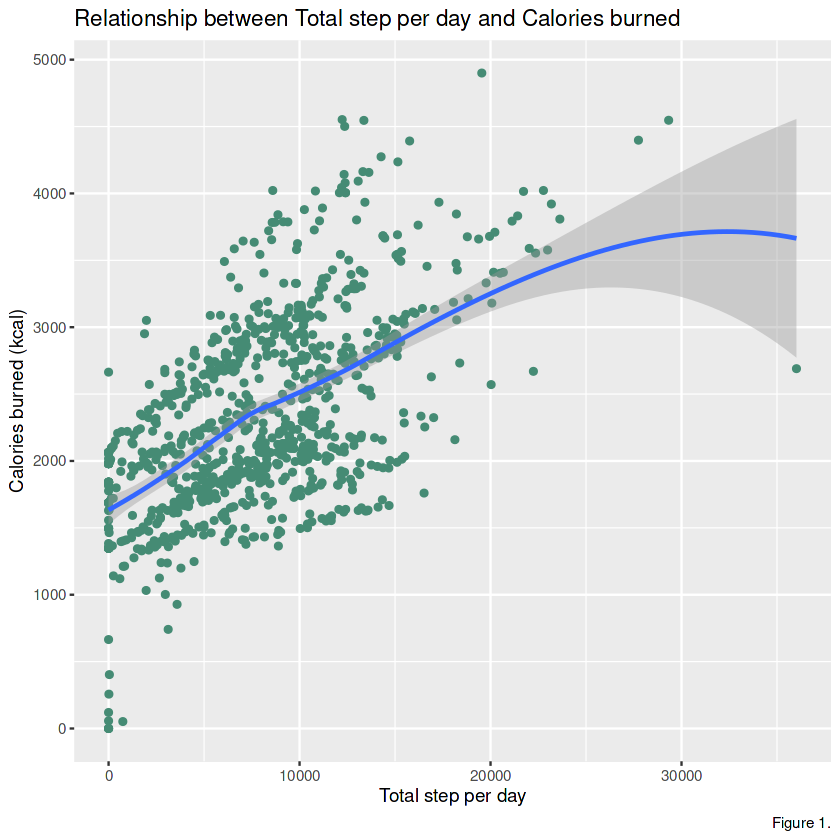

In [9]:
# Plot TotalSteps vs Calories
dailyData %>% 
  ggplot(aes(x = TotalSteps, y = Calories)) +
  geom_point(color = "aquamarine4") +
  geom_smooth() +
  labs(title = "Relationship between Total step per day and Calories burned",
      caption = "Figure 1.") +
  xlab("Total step per day") +
  ylab("Calories burned (kcal)")

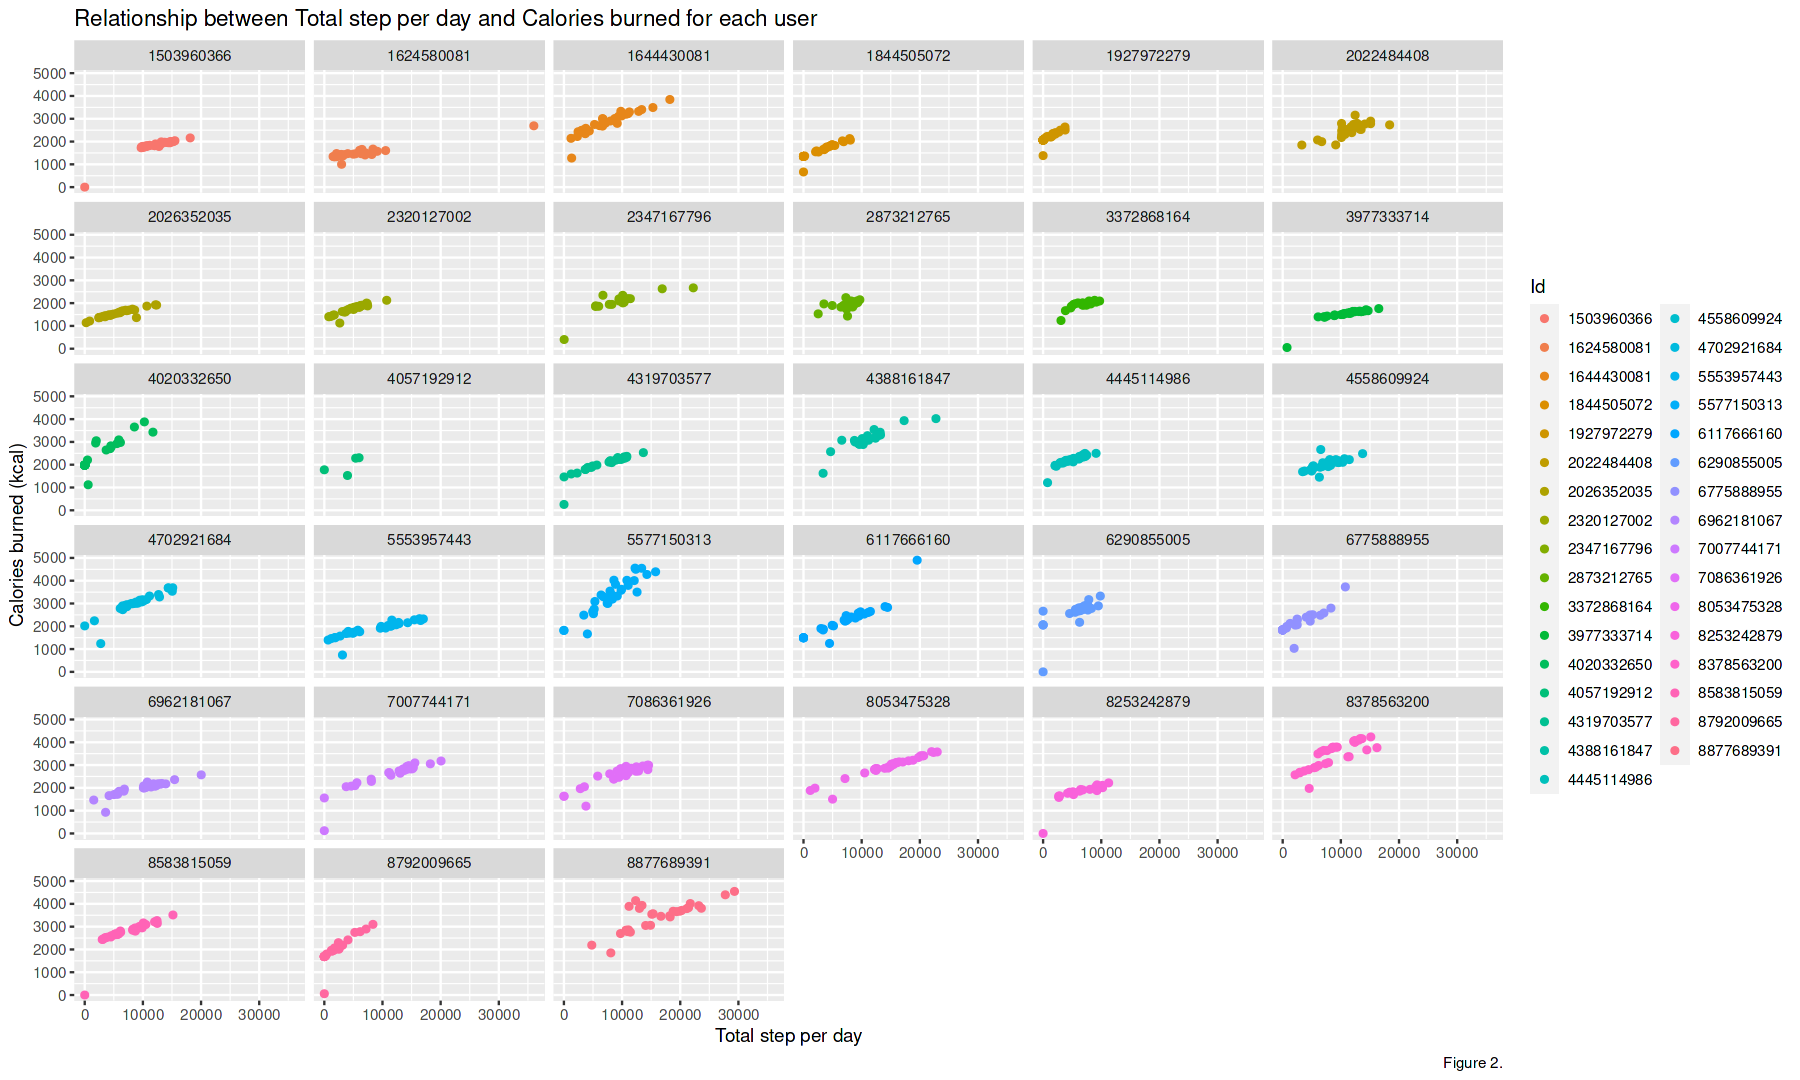

In [10]:
# Expand plot size
options(repr.plot.width = 15, repr.plot.height = 9)

# Plot TotalSteps vs Calories in each user
dailyData %>% 
  ggplot(aes(x = TotalSteps, y = Calories, color = Id)) +
  geom_point() +
  facet_wrap(~Id) +
  labs(title = "Relationship between Total step per day and Calories burned for each user",
      caption = "Figure 2.") +
  xlab("Total step per day") +
  ylab("Calories burned (kcal)")

# Resize plot size
options(repr.plot.width = NULL, repr.plot.height = NULL)

In Figure 1 shows that there is a positive correlation between `Total step per day` and `Calories burned`, but if look closer into each user in Figure 2, found varied trends. This means calories burned per step is unique for each person.

In [11]:
# Group data into Id
dailyDataPerUser <- dailyData %>%
  group_by(Id) %>%
  summarise(avg_steps = mean(TotalSteps),
            avg_sleep = mean(TotalMinutesAsleep, na.rm = TRUE)/60,
            avg_active = mean(TotalActiveMinutes)/60,
            avg_sedent = mean(SedentaryMinutes)/60,
            avg_cal = mean(Calories))

head(dailyDataPerUser)
summary(dailyDataPerUser)

Id,avg_steps,avg_sleep,avg_active,avg_sedent,avg_cal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,6.004667,4.630108,14.13602,1816.419
1624580081,5743.903,NaN,2.799462,20.96237,1483.355
1644430081,7282.967,4.900000,3.490000,19.36444,2811.300
1844505072,2580.065,10.866667,1.947849,20.11022,1573.484
1927972279,916.129,6.950000,0.677957,21.95699,2172.806
2022484408,11370.645,NaN,5.218280,18.54301,2509.968


      Id              avg_steps         avg_sleep        avg_active   
 Length:33          Min.   :  916.1   Min.   : 1.017   Min.   :0.678  
 Class :character   1st Qu.: 5566.9   1st Qu.: 5.605   1st Qu.:2.836  
 Mode  :character   Median : 7283.0   Median : 6.985   Median :4.078  
                    Mean   : 7527.1   Mean   : 6.294   Mean   :3.755  
                    3rd Qu.: 9519.7   3rd Qu.: 7.488   3rd Qu.:4.776  
                    Max.   :16040.0   Max.   :10.867   Max.   :5.686  
                                      NA's   :9                       
   avg_sedent       avg_cal    
 Min.   :11.04   Min.   :1483  
 1st Qu.:12.68   1st Qu.:1917  
 Median :17.96   Median :2132  
 Mean   :16.65   Mean   :2283  
 3rd Qu.:20.11   3rd Qu.:2600  
 Max.   :21.96   Max.   :3454  
                               

The summary shows that users have an average step around 7,500 steps/day and **75% users** have step lower than 10,000 (Lower than Q3) and average sleep duration around 6.3 hours and **50% users** have sleep duration lower than 7.0 hours (Lower than median).

Warning message:
“Removed 530 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 530 rows containing missing values (`geom_point()`).”


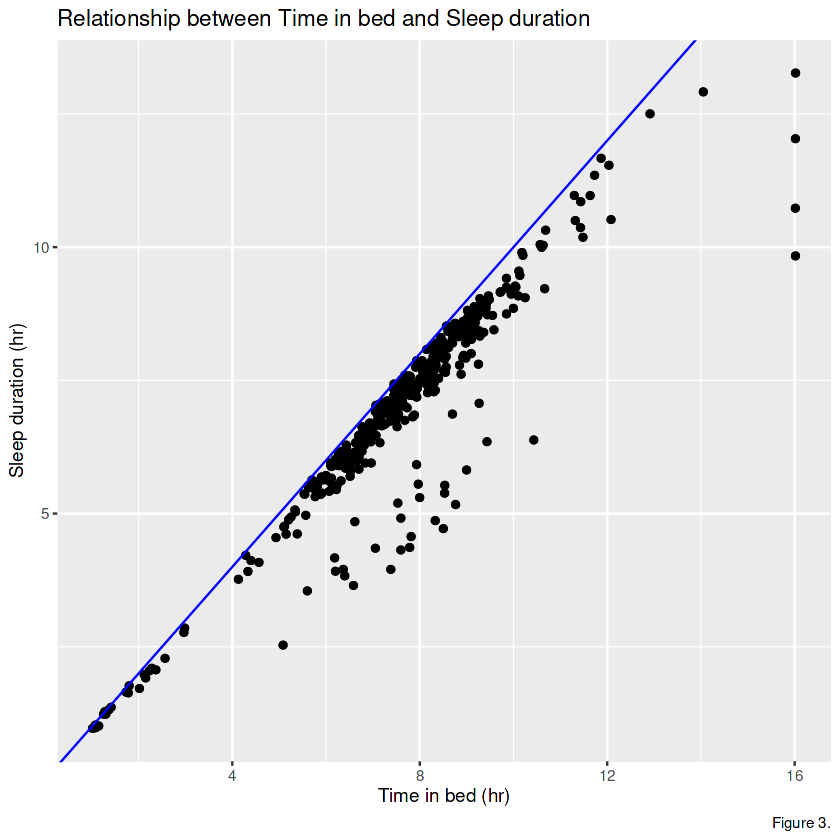

In [12]:
# Plot Time in bed vs Sleep duration
dailyData %>%
  ggplot(aes(x = TotalTimeInBed/60, y = TotalMinutesAsleep/60)) + 
  geom_point() +
  geom_jitter() +
  labs(title = "Relationship between Time in bed and Sleep duration",
       caption = "Figure 3.") +
  xlab("Time in bed (hr)") +
  ylab("Sleep duration (hr)") +
  geom_abline(slope = 1, intercept = 0, color = "blue")

From Figure 3, there is positive correlation between Time in bed and Sleep duration. For some data that have a big difference between those time (or data which far from inclined straight line), may represent the sleep quality (Long time in bed, but short sleep duration).

**Next question**: Is weekday influence users' activities?  
Then group data into weekday to explore the correlation.

In [13]:
# Group data into weekday
dailyDataPerWeek <- dailyData %>%
  group_by(wkDay) %>%
  summarise(avg_steps = mean(TotalSteps),
            avg_sleep = mean(TotalMinutesAsleep, na.rm = TRUE)/60,
            avg_active = mean(TotalActiveMinutes)/60,
            avg_sedent = mean(SedentaryMinutes)/60,
            avg_cal = mean(Calories))

head(dailyDataPerWeek)

wkDay,avg_steps,avg_sleep,avg_active,avg_sedent,avg_cal
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Monday,7819.083,6.980496,3.825620,17.08609,2338.099
Tuesday,8125.007,6.742308,3.910526,16.78936,2356.013
Wednesday,7559.373,7.244697,3.728889,16.49133,2302.620
Thursday,7420.682,6.706154,3.616892,16.02579,2204.297
Friday,7448.230,6.757018,3.939418,16.67183,2331.786
Saturday,8202.712,7.013506,4.103867,16.01973,2365.592


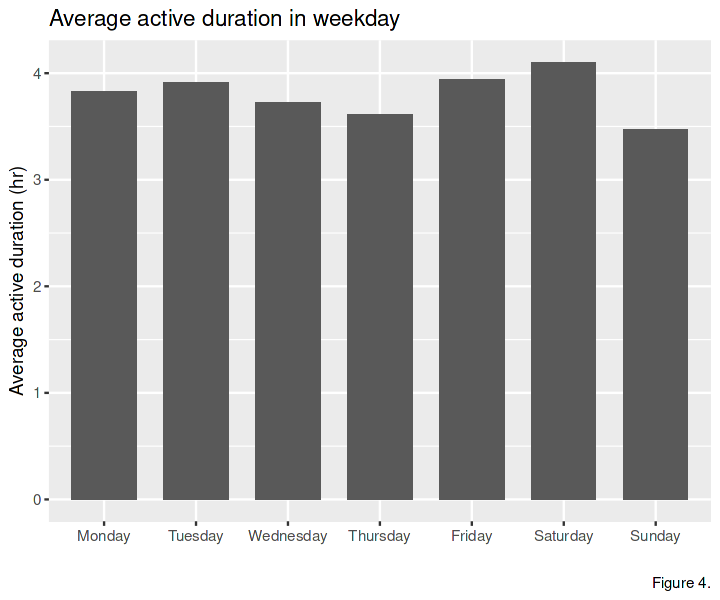

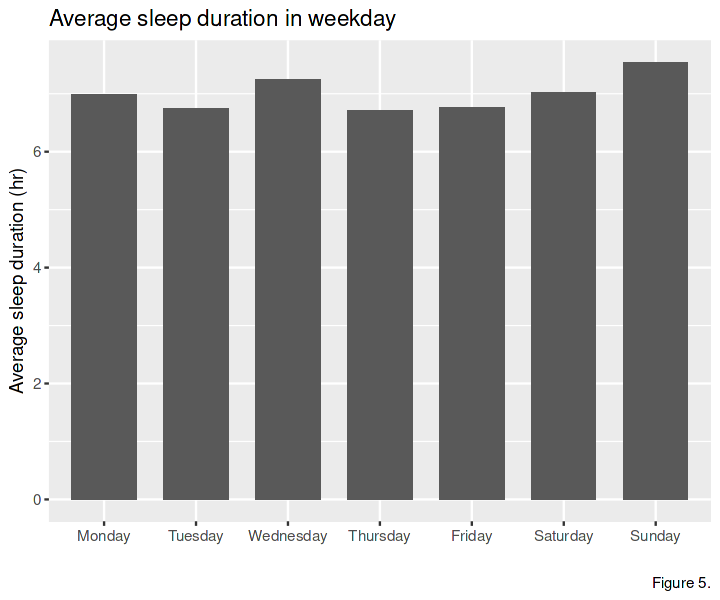

In [14]:
# Resize plot size
options(repr.plot.width = 6, repr.plot.height = 5)

# Plot active duration in weekday
dailyDataPerWeek %>% 
  ggplot(aes(x = wkDay, y = avg_active)) +
  geom_col(width = 0.7) +
  labs(title = "Average active duration in weekday",
       caption = "Figure 4.") +
  xlab("") +
  ylab("Average active duration (hr)") 

# Plot sleep duration in weekday
dailyDataPerWeek %>% 
  ggplot(aes(x = wkDay, y = avg_sleep)) +
  geom_col(width = 0.7) +
  labs(title = "Average sleep duration in weekday",
       caption = "Figure 5.") +
  xlab("") +
  ylab("Average sleep duration (hr)")

Figure 4 shows that on sunday, users have the lowest active duration. In contrast, on saturday have highest active duration.

Figure 5 shows the longest sleep duration is on sunday.

## Findings

- Users have an average step around 7,500 steps/day and **75% users** have step lower than 10,000 and average sleep duration around 6.3 hours and **50% users** have sleep duration lower than 7.0 hours.

- Positive correlation between `Total step per day` and `Calories burned`, but has a unique trends for each person.

- Positive correlation between `Time in bed` and `Sleep duration`. For some data that have a big difference between those time, may represent the sleep quality (Long time in bed, but short sleep duration).

- On sunday, users tend to have lower active and longer sleep duration than other day, may imply that they need relaxation on this lazy day. However they seem to be more active on sunday, may be they do the housework then reward themselve on sunday :)

## Recommendation

- Remind users via our app when they walk (or active) less than 8,000 steps, the studies have shown that 8,000 or more steps a day had a reduced risk of death (Ref: [National Institutes of Health](https://www.nih.gov/news-events/nih-research-matters/number-steps-day-more-important-step-intensity))

- Due to each person has different charateristic (e.g. calorie burned per step), we could design our service that can customize for individuals. We may reverse the calculation to find how many steps to achieve the calorie burned target.

- Design our product to analyze the sleep quality and duration. If the users have sleep duration lower than 7 hours for several days, remind them to go to bed early. For adult (18-60 years), recommended to have 7 or more hours per night (Ref: [Centers for Disease Control and Prevention](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html))